In [2]:
!pip install geopandas
!pip install numpy
!pip install matplotlib
!pip install shapely
!pip install pandas

import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import shapely as php
import pandas as pd


In [3]:
ruta_municipios = "/content/municipios.geojson"
ruta_precios = "/content/precios_combustible.csv"

precios = gpd.read_file(ruta_precios)
shape = gpd.read_file(ruta_municipios)

In [4]:
precios.head()

,departamentocodigo,departamentonombre,municipiocodigo,municipionombre,agente,bandera,direccion,producto,precio,estado,fecharegistro,geometry
0,18,CAQUETA,18756,SOLANO,COMERCIALIZADORA EL HUECO,TERPEL,Puerto Principal,BIODIESEL EXTRA,8500,1,01/08/2015 12:00:00 AM,None
1,99,VICHADA,99624,SANTA ROSALIA,ESTACION DE SERVICIO LA VICTORIA,BRIO,Carrera 9 con calle 3 No. 08-92-96,BIODIESEL EXTRA,9000,1,01/08/2016 12:00:00 AM,None
2,25,CUNDINAMARCA,25175,CHIA,COMERCIAL SANTA INES LIMITADA EN LIQUIDACION,TERPEL,CARRERA 1 No. 6A-60,GASOLINA CORRIENTE OXIGENADA,8060,1,01/04/2017 12:00:00 AM,None
3,05,ANTIOQUIA,05837,TURBO,BOMBA CODI EL PUEBLO,PROXXON,CRA 13 99 A 41,BIODIESEL EXTRA,8893,1,05/07/2018 12:00:00 AM,None
4,47,MAGDALENA,47605,REMOLINO,ESTACION DE SERVICIOS LA RUTA,ECOS,FINCA EL CHORY ENTRADA A REMOLINO EN REMOLINO,BIODIESEL EXTRA,7500,1,01/28/2017 12:00:00 AM,None


<Axes: >

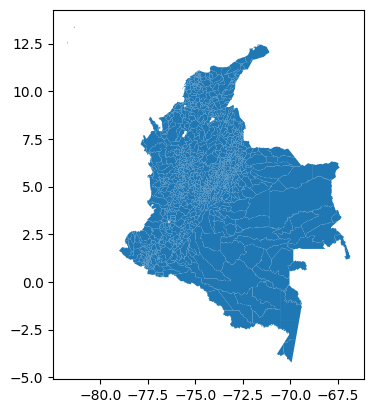

In [6]:
shape.plot()

In [15]:
# Listar los productos únicos
precios["producto"].unique()

# Filtrar los productos para "producto" == "GASOLINA CORRIENTE"
precios_gasolina = precios[precios["producto"] == "GASOLINA CORRIENTE OXIGENADA"]

# Ordenar y filtrar por producto
print(len(precios_gasolina))
precios_gasolina.head()

5291


,departamentocodigo,departamentonombre,municipiocodigo,municipionombre,agente,bandera,direccion,producto,precio,estado,fecharegistro,geometry
2,25,CUNDINAMARCA,25175,CHIA,COMERCIAL SANTA INES LIMITADA EN LIQUIDACION,TERPEL,CARRERA 1 No. 6A-60,GASOLINA CORRIENTE OXIGENADA,8060,1,01/04/2017 12:00:00 AM,None
5,68,SANTANDER,68235,EL CARMEN DE CHUCURI,ESTACION DE SERVICIO EL PORVENIR CARMEN DE CHU...,TERPEL,CORREGIMIENTO EL CENTENARIO,GASOLINA CORRIENTE OXIGENADA,9080,1,01/22/2015 12:00:00 AM,None
7,47,MAGDALENA,47605,REMOLINO,ESTACION DE SERVICIOS LA RUTA,ECOS,FINCA EL CHORY ENTRADA A REMOLINO EN REMOLINO,GASOLINA CORRIENTE OXIGENADA,8300,1,01/28/2017 12:00:00 AM,None
8,95,GUAVIARE,95200,MIRAFLORES,ESTACION DE SERVICIO LA ESMERALDA 1,TERPEL,VIA AEROPUERTO PRINCIPAL BARRIO CHINO,GASOLINA CORRIENTE OXIGENADA,10900,1,01/29/2018 12:00:00 AM,None
12,52,NARIÑO,52256,EL ROSARIO,ESTACION DE SERVICIO AUTOCENTRO ESMERALDAS,BIOMAX,CORREGIMIENTO LA ESMERALDA,GASOLINA CORRIENTE OXIGENADA,6500,1,01/24/2018 12:00:00 AM,None


In [16]:
# Precios agrupados
precios_agrupados = precios_gasolina.groupby("municipionombre", as_index=False)["precio"].agg({"max"})
precios_mapa = shape.merge(precios_agrupados, right_on="municipionombre", left_on="MPIO_CNMBR")


In [13]:
!pip install mapclassify>=2.4.0


Text(0.5, 1.0, 'Precios de gasolina 2018')

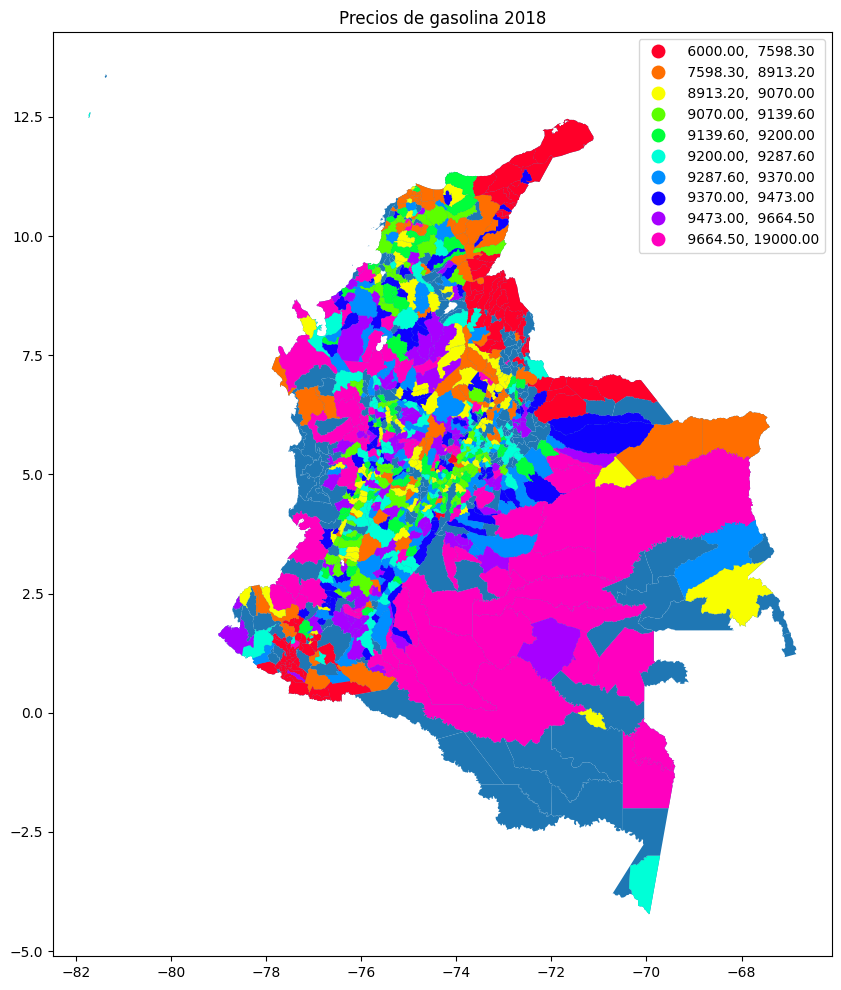

In [17]:
# Dibujar sobre el mapa
axis = shape["geometry"].plot(figsize=(20, 12))
precios_mapa["max"] = precios_mapa["max"].apply(lambda x: int(x))
precios_mapa.plot(column="max", ax=axis, legend=True, scheme="Quantiles", k=10, cmap="gist_rainbow")
axis.set_title("Precios de gasolina 2018")